# Applied Machine Learning Project 2 - Group 14 - Rakshitha, Diana¶

# Regression Task - with and without PCA

# Zomato Dataset to predict the Aggregate Rating

DATASET DESCRIPTION

Restaurant ID: Identification Number Restaurant Name: Name Of the Restaurant Country Code: 216 City: Name of the Restaurant Address: Locality: Short Address Of the Restaurant Locality Verbose: Long Address of the Restaurant Longitude: Longitude Latitude: Latitude Cuisines: Types Of Cuisines Served Average Cost for two: Average Cost if two people visit the Restaurant Currency: Dollars Has Table booking: Can we book tables in Restaurant? Yes/No Has Online delivery: Can we have online delivery ? Yes/No Is delivering now: Is the Restaurant delivering food now? Yes/No Switch to order menu: Switch to order menu ? Yes/ No Price range: Categorized price between 1 -4 Aggregate rating: Categorizing ratings between 1-5 Rating color: Different colors representing Customer Rating Rating text: Different Rating like Excellent, Very Good ,Good, Avg., Poor, Not Rated Votes: No.Of Votes received by restaurant from customers


Target variable: Aggregate Rating

LINK TO DATASET: https://www.kaggle.com/shrutimehta/zomato-restaurants-data

# Bagging, Pasting, Boosting and Deep Learning Models
### Bagging - Ridge, KNN
### Pasting - Linear SVR, LASSO
### Ada Boosting - Linear Regression, Linear SVR
### Gradient Boosting - Polynomial

## Importing Libraries

In [0]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV

## Loading Datasets

In [0]:
#data= pd.read_csv('zomato_dataset_regression.csv',encoding="ISO-8859-1")
from google.colab import files
uploaded = files.upload()
import io
data = pd.read_csv(io.BytesIO(uploaded['zomato_dataset_regression.csv']),encoding="ISO-8859-1")

Saving zomato_dataset_regression.csv to zomato_dataset_regression.csv


In [0]:
data.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Average Cost in Dollars,ConvertedCurrency,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100.0,103.4,Dollar($),Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314.0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200.0,112.8,Dollar($),Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591.0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000.0,376.0,Dollar($),Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270.0


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 23 columns):
Restaurant ID              9551 non-null int64
Restaurant Name            9551 non-null object
Country Code               9551 non-null int64
City                       9551 non-null object
Address                    9551 non-null object
Locality                   9551 non-null object
Locality Verbose           9551 non-null object
Longitude                  9551 non-null float64
Latitude                   9551 non-null float64
Cuisines                   9542 non-null object
Average Cost for two       9445 non-null float64
Average Cost in Dollars    9445 non-null float64
ConvertedCurrency          9551 non-null object
Currency                   9551 non-null object
Has Table booking          9551 non-null object
Has Online delivery        9551 non-null object
Is delivering now          9551 non-null object
Switch to order menu       9551 non-null object
Price range                

In [0]:
data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Average Cost in Dollars,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9445.000000,9445.000000,9551.000000,9448.000000,9445.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1140.620752,11.802254,1.804837,2.654657,155.282478
std,8.791521e+06,56.750546,41.467058,11.007935,15818.953867,17.688935,0.905609,1.518707,429.623867
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,4.500000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,7.500000,2.000000,3.200000,30.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,12.000000,2.000000,3.700000,128.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,564.000000,4.000000,4.900000,10934.000000


In [0]:
data.isna().any()

Restaurant ID              False
Restaurant Name            False
Country Code               False
City                       False
Address                    False
Locality                   False
Locality Verbose           False
Longitude                  False
Latitude                   False
Cuisines                    True
Average Cost for two        True
Average Cost in Dollars     True
ConvertedCurrency          False
Currency                   False
Has Table booking          False
Has Online delivery        False
Is delivering now          False
Switch to order menu       False
Price range                False
Aggregate rating            True
Rating color               False
Rating text                False
Votes                       True
dtype: bool

In [0]:
#get the mean of Average Cost in Dollars and replace it NaN
data['Average Cost in Dollars'].fillna(data['Average Cost in Dollars'].mean(), inplace = True) 

In [0]:
#get the mean of Aggregate rating  and replace it NaN
data['Aggregate rating'].fillna(data['Aggregate rating'].mean(), inplace = True) 

In [0]:
#get the mean of Votes  and replace it NaN
data['Votes'].fillna(data['Votes'].mean(), inplace = True)

In [0]:
#data cleanup for categorical variables
cleanup = {'Has Table booking': {'Yes': 1, 'No': 0}, #Encoding Yes as 1 and No as 0
           'Has Online delivery': {'Yes': 1, 'No': 0},
           'Is delivering now' : {'Yes': 1, 'No': 0},
           'Switch to order menu' : {'Yes': 1, 'No': 0},
           'Rating text' : {'Not rated': 0, 'Poor': 1, 'Average': 2, 'Good': 3, 'Very Good': 4, 'Excellent' : 5}}
data.replace(cleanup, inplace = True)
noRatng = data[data['Rating text']==0]
print(noRatng['Rating text'].count())
data = data[data['Rating text']!=0]
data.head()

2148


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Average Cost in Dollars,ConvertedCurrency,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100.0,103.4,Dollar($),Botswana Pula(P),1,0,0,0,3,4.8,Dark Green,5,314.0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200.0,112.8,Dollar($),Botswana Pula(P),1,0,0,0,3,4.5,Dark Green,5,591.0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000.0,376.0,Dollar($),Botswana Pula(P),1,0,0,0,4,4.4,Green,4,270.0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500.0,141.0,Dollar($),Botswana Pula(P),0,0,0,0,4,4.9,Dark Green,5,365.0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500.0,141.0,Dollar($),Botswana Pula(P),1,0,0,0,4,4.8,Dark Green,5,229.0


By the below analysis we found out that if the audit risk score is greater than 1 risk is 1, and if the audit risk score is less than 1 risk is 0. Also Risk in Data1 and Risk in Data 2 should be the same but they are different on 181 instances.
so we dont take the risk column from data2

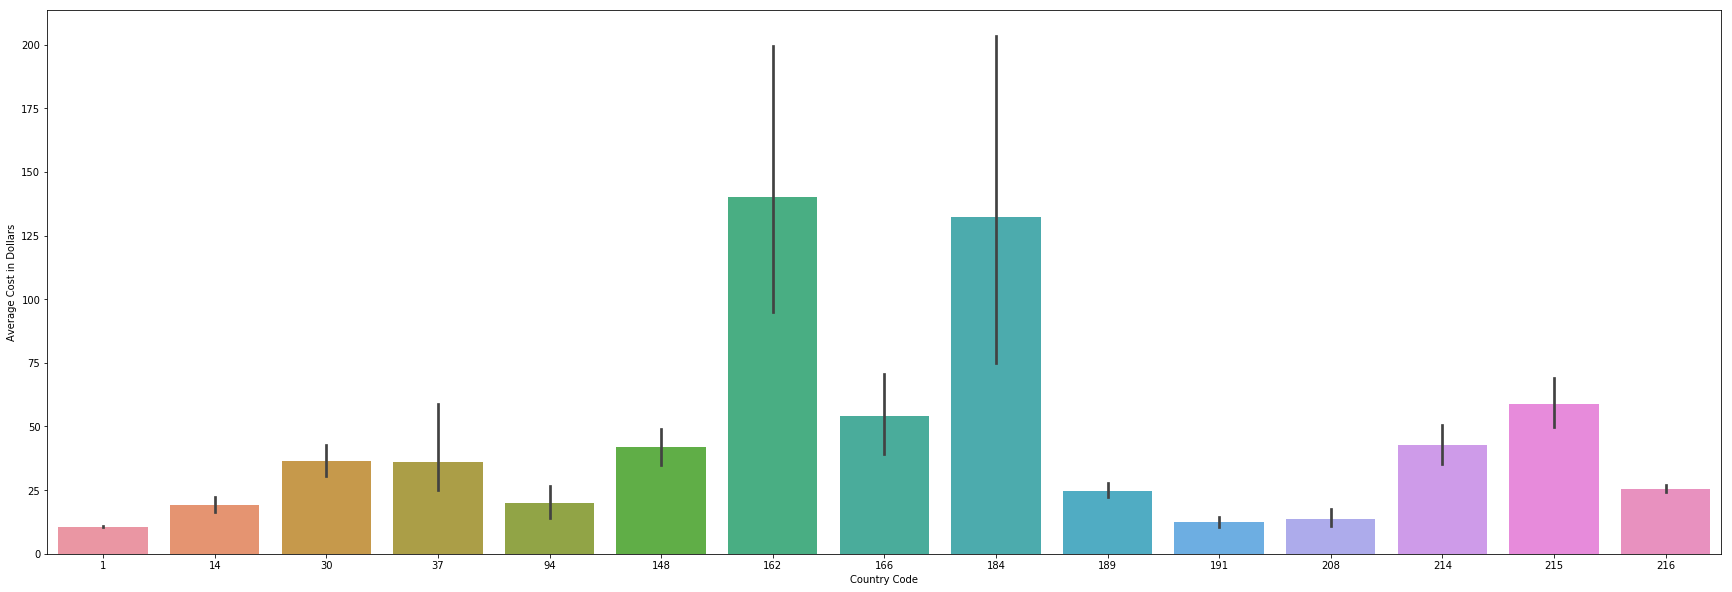

In [0]:
plt.figure(figsize=(30,10))
sns.barplot(x='Country Code',y='Average Cost in Dollars',data= data,estimator=np.mean)

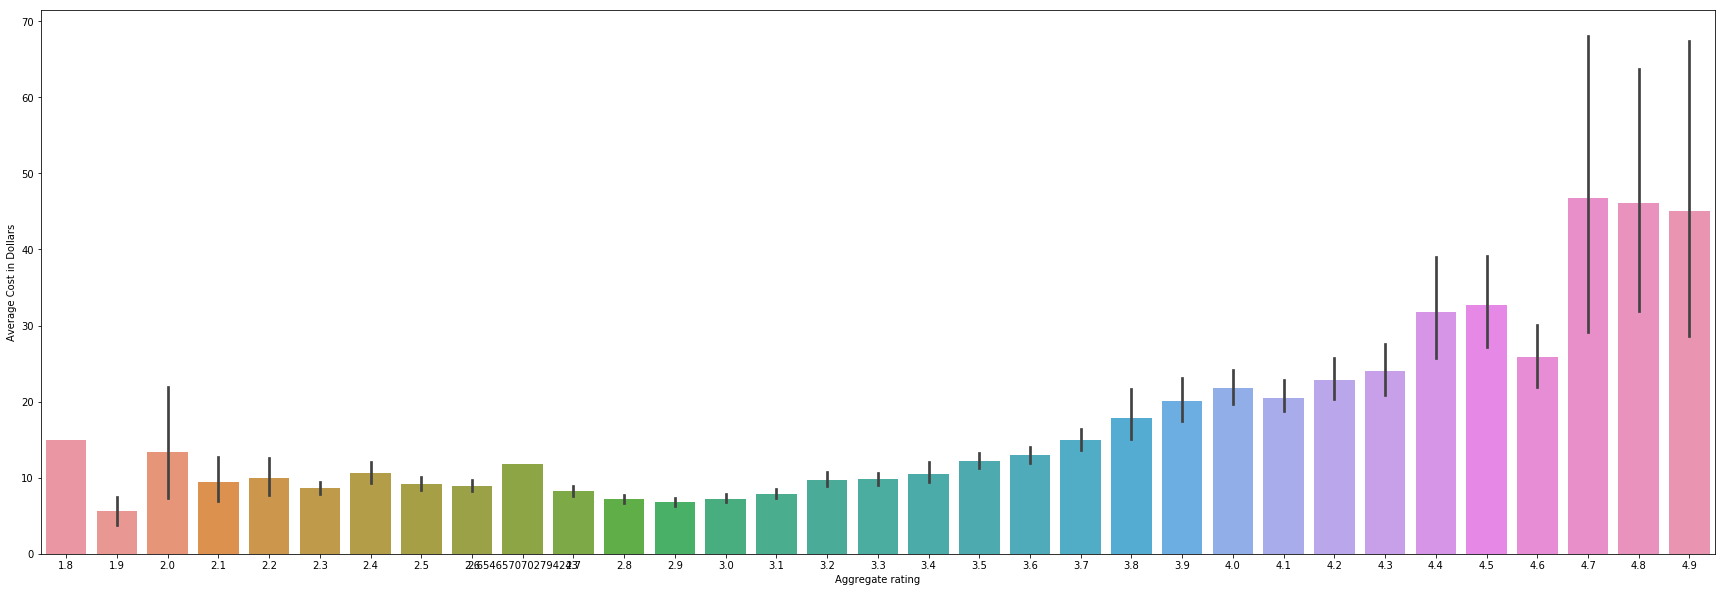

In [0]:
plt.figure(figsize=(30,10))
sns.barplot(x='Aggregate rating',y='Average Cost in Dollars',data= data,estimator=np.mean)

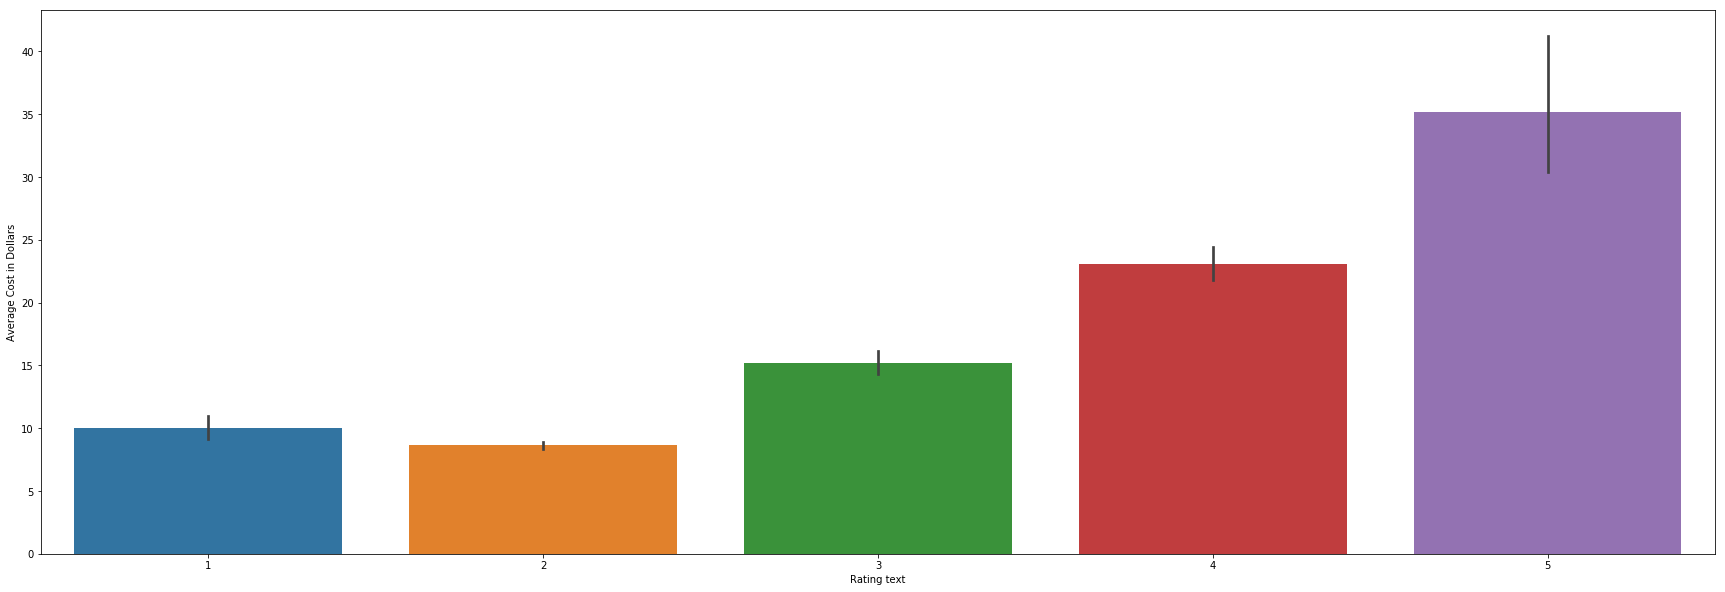

In [0]:
plt.figure(figsize=(30,10))
sns.barplot(x='Rating text',y='Average Cost in Dollars',data= data,estimator=np.mean)

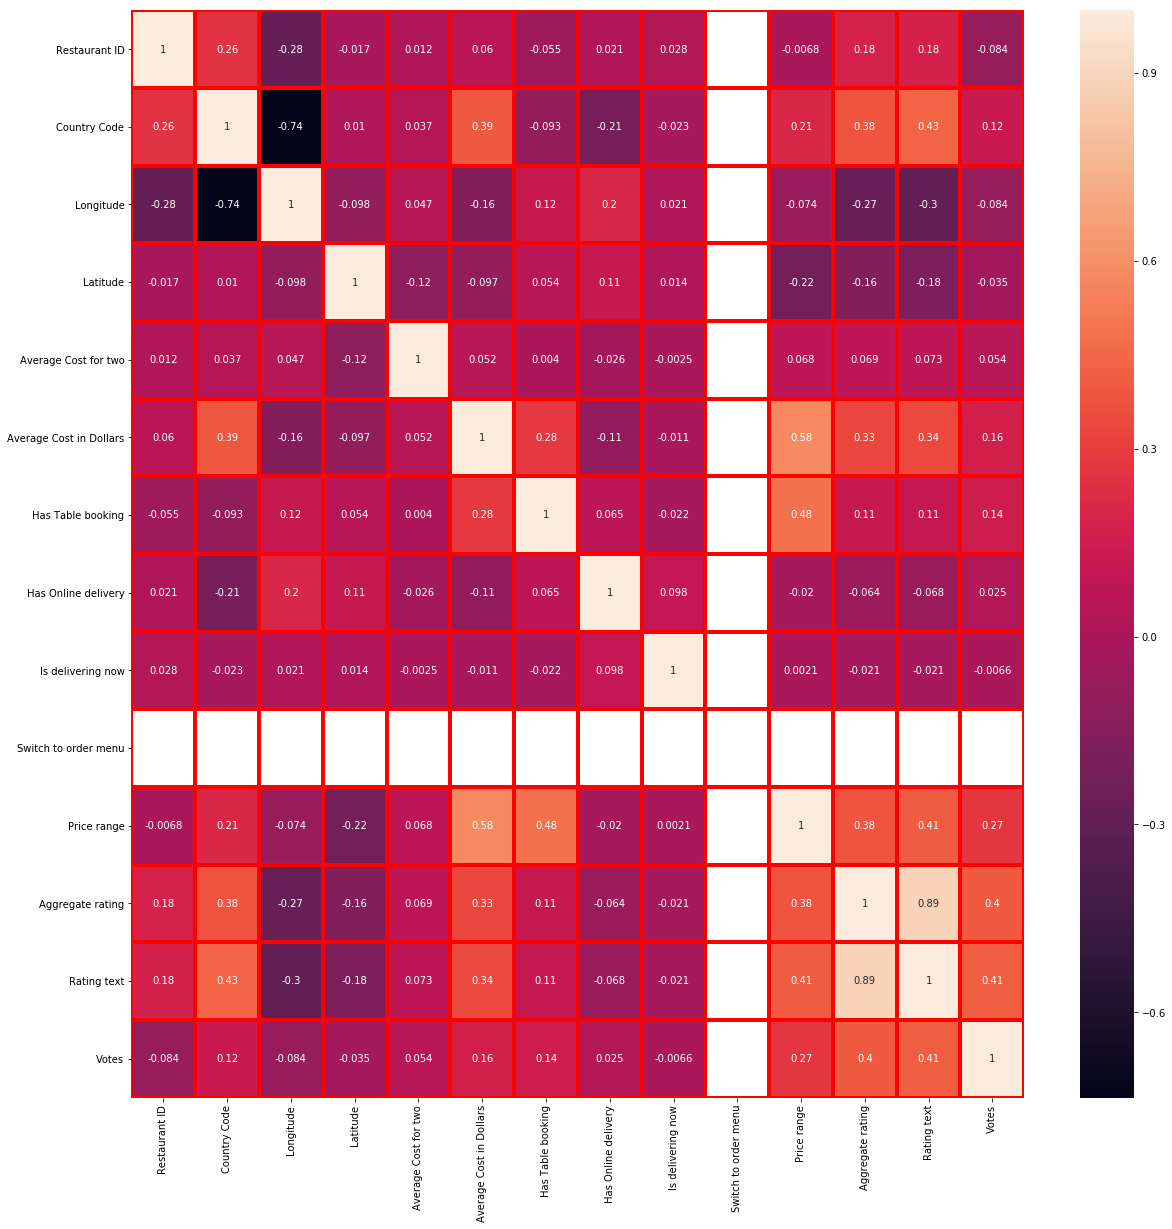

In [0]:
#plotting correlation matrix with all the features
plt.figure(figsize=(20,20))
d=data.corr()
sns.heatmap(d,annot= True,linecolor='red',linewidths=3)

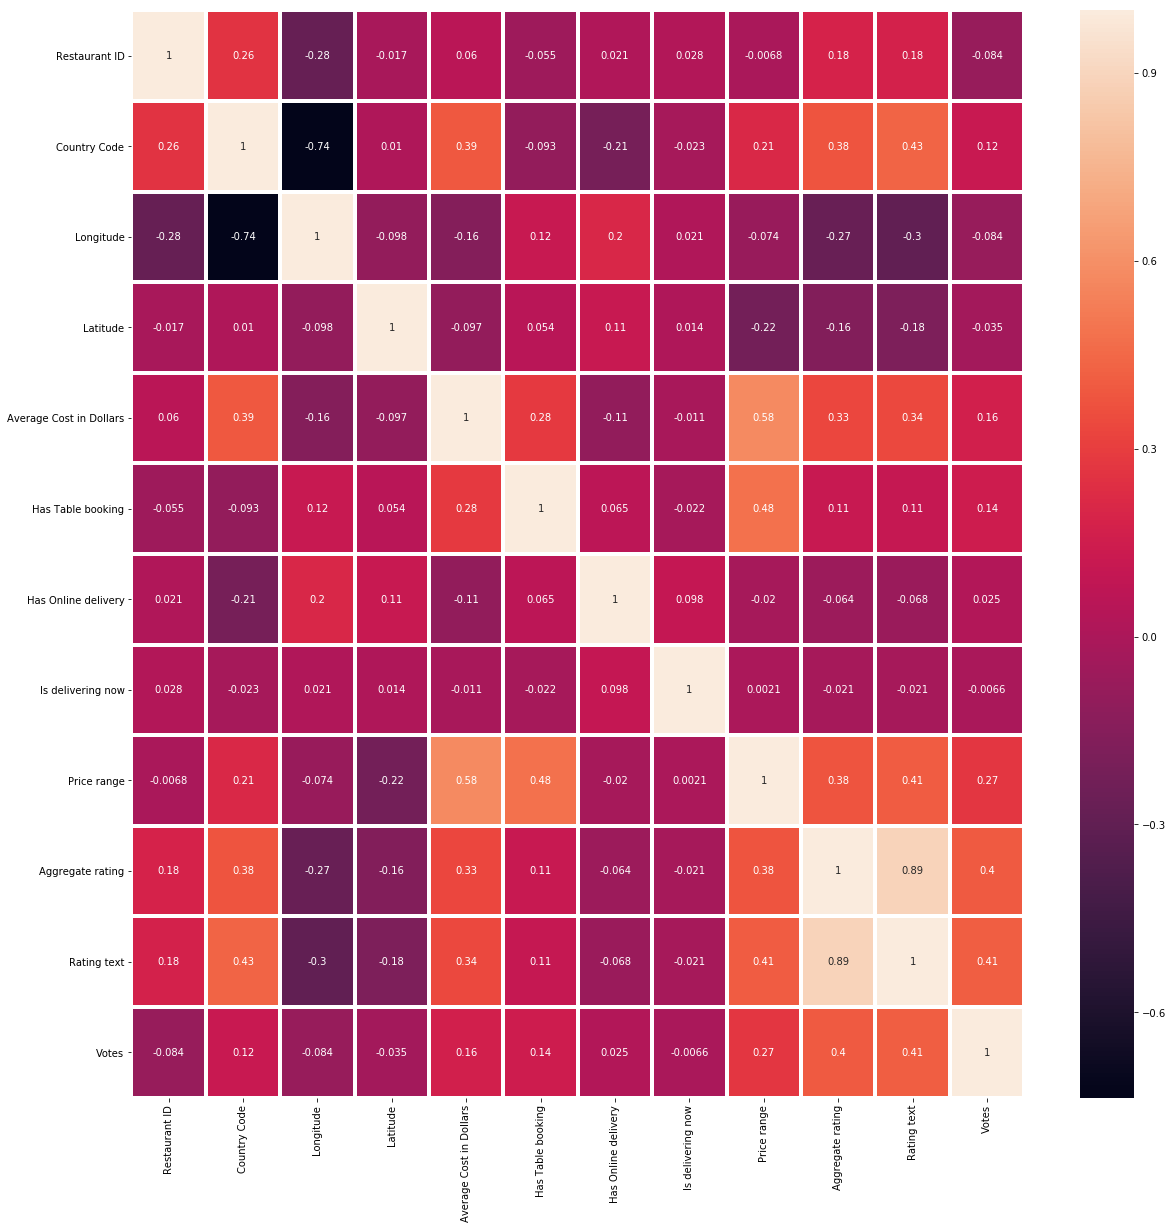

In [0]:
#plotting correlation matrix with all the features excluding the less important features
data.drop(['Cuisines','Average Cost for two','Restaurant Name','City','Address','Locality','Locality Verbose','ConvertedCurrency', 'Currency' ,'Rating color','Switch to order menu'],axis=1,inplace=True)
data_corr1= data.corr()
fig=plt.figure(figsize=(20,20))
sns.heatmap(data_corr1,annot= True,linecolor='white',linewidths=3)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7403 entries, 0 to 9550
Data columns (total 12 columns):
Restaurant ID              7403 non-null int64
Country Code               7403 non-null int64
Longitude                  7403 non-null float64
Latitude                   7403 non-null float64
Average Cost in Dollars    7403 non-null float64
Has Table booking          7403 non-null int64
Has Online delivery        7403 non-null int64
Is delivering now          7403 non-null int64
Price range                7403 non-null int64
Aggregate rating           7403 non-null float64
Rating text                7403 non-null int64
Votes                      7403 non-null float64
dtypes: float64(5), int64(7)
memory usage: 1.0 MB


# Regressions

In [0]:
from sklearn.model_selection import train_test_split
x= data.drop('Aggregate rating',axis=1)
y=data['Aggregate rating']
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=150)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# 1. Linear Regression

In [0]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True)
lr.fit(x_train,y_train)
print("Train:%.4f"%lr.score(x_train,y_train))
print("Test:%.4f"%lr.score(x_test,y_test))

Train:0.8007
Test:0.7686


## Applying AdaBoost on Linear Regression

In [0]:
#grid search to find the best parameters

from sklearn.ensemble import AdaBoostRegressor
param_grid=[{'n_estimators':[2,5,10,25,100,150,200,300,400,500],'learning_rate':[0.0001,0.01,0.02,0.03,0.04,0.05,0.06,0.1,0.15]}]
lr = LinearRegression(fit_intercept=True)
ada_lr = AdaBoostRegressor(lr,random_state=0)
grid = GridSearchCV(ada_lr,param_grid,cv=5)
grid.fit(x_train,y_train)
grid.best_params_

{'learning_rate': 0.0001, 'n_estimators': 500}

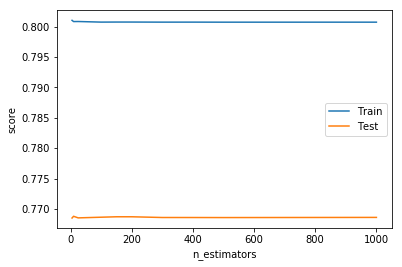

In [0]:
#plotting a train test graph to see if the param  n_estimator is reliable
train_score_list=[]
test_score_list=[]
for i in [5,10,25,100,150,200,300,400,500,1000]:
    lr = LinearRegression(fit_intercept=True)
    ada = AdaBoostRegressor(lr,n_estimators=i,learning_rate=0.0001,random_state=150)
    ada.fit(x_train,y_train)
    val_train=ada.score(x_train,y_train)
    train_score_list.append(val_train)
    val_test= ada.score(x_test,y_test)
    test_score_list.append(val_test)
#plot
plt.figure()
plt.plot([5,10,25,100,150,200,300,400,500,1000],train_score_list,label='Train')
plt.plot([5,10,25,100,150,200,300,400,500,1000],test_score_list,label='Test')
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.legend()
plt.show()

In [0]:
print('train score after using ada boost is ')
print(train_score_list[1])


train score after using ada boost is 
0.8008282437295944


In [0]:
print('test score  after using ada boost is ')
print(test_score_list[1])

test score  after using ada boost is 
0.7687859227208522


In [0]:
lr=LinearRegression(fit_intercept=True)
lr.fit(x_train,y_train)
ones=np.ones((x_train.shape[0],1))
array=np.array(x_train)
xdesg=np.matrix(np.hstack((ones,array)))
xdesg=np.matrix(xdesg)
coef=lr.coef_.tolist()
coef.insert(0,lr.intercept_)
theta1=(np.array(coef).reshape(12,1))
y_actual=np.array(y_train).reshape(x_train.shape[0],1)
theta1

array([[ 3.42921613e+00],
       [ 2.12712847e-02],
       [-3.49873089e-02],
       [-2.30329996e-02],
       [-1.92826370e-03],
       [ 3.14045517e-02],
       [ 1.07557515e-03],
       [-3.09756098e-03],
       [-3.56940057e-03],
       [-5.93938123e-03],
       [ 4.81677208e-01],
       [ 2.28333027e-02]])

### Performing Gradient Descent

In [0]:
def hypothesis(theta, X,n):
    h = np.ones((X.shape[0],1))
    theta = theta.reshape(1,n+1)
    for i in range(0,X.shape[0]):
        h[i] = float(np.dot(theta,xdesg.T[:,i]))
    h = h.reshape(X.shape[0],1)
    return h

In [0]:
h=hypothesis(theta1,xdesg,11)

In [0]:
def BGD(theta, alpha, num_iters, h, X, y, n):
    cost = np.ones(num_iters)
    for i in range(0,num_iters):
        theta[0] = theta[0] - (alpha/X.shape[0]) * float(sum(h - y))
        for j in range(1,n+1):
            theta[j] = theta[j] - ((alpha/X.shape[0]) * float(sum(np.dot(X.T[j],(h-y)))))
        h = hypothesis(theta, X, n)
        cost[i] = (1/X.shape[0]) * 0.5 * float(sum(np.square(h - y_actual)))
    theta = theta.reshape(1,n+1)
    return theta, cost

In [0]:
def linear_regression(X, y, alpha, num_iters):
    n = 11
    # initializing the parameter vector...
    theta = np.zeros(n+1)
    # hypothesis calculation....
    h = hypothesis(theta, xdesg, 11)
    # returning the optimized parameters by Gradient Descent...
    theta, cost = BGD(theta,alpha,num_iters,h,X,y,n)
    return theta, cost

In [0]:
list1=[]
for alpha in [0.001,0.01,0.1]:
    list1.append(linear_regression(xdesg,y_actual,alpha,1000)[1])

In [0]:
linear_regression(xdesg,y_actual,0.1,1000)

(array([[ 3.42921613e+00,  2.12712847e-02, -3.49873088e-02,
         -2.30329996e-02, -1.92826370e-03,  3.14045517e-02,
          1.07557516e-03, -3.09756098e-03, -3.56940057e-03,
         -5.93938122e-03,  4.81677208e-01,  2.28333027e-02]]),
 array([4.87620173, 3.94775675, 3.20053199, 2.59771411, 2.11062364,
        1.7166276 , 1.39770627, 1.13942744, 0.93018645, 0.76062795,
        0.62319695, 0.51178552, 0.42145194, 0.34819611, 0.288779  ,
        0.2405773 , 0.201466  , 0.16972356, 0.14395513, 0.12303049,
        0.10603378, 0.09222277, 0.0809959 , 0.07186559, 0.06443661,
        0.05838853, 0.05346158, 0.0494451 , 0.04616827, 0.04349251,
        0.04130542, 0.03951579, 0.03804961, 0.03684678, 0.03585852,
        0.03504521, 0.03437464, 0.03382065, 0.03336196, 0.03298126,
        0.03266447, 0.03240011, 0.03217882, 0.03199299, 0.0318364 ,
        0.03170395, 0.03159149, 0.03149561, 0.03141354, 0.03134298,
        0.03128204, 0.03122918, 0.03118313, 0.03114282, 0.03110739,
        0

### Cost Function Vs Number Of Iterations gradient descent

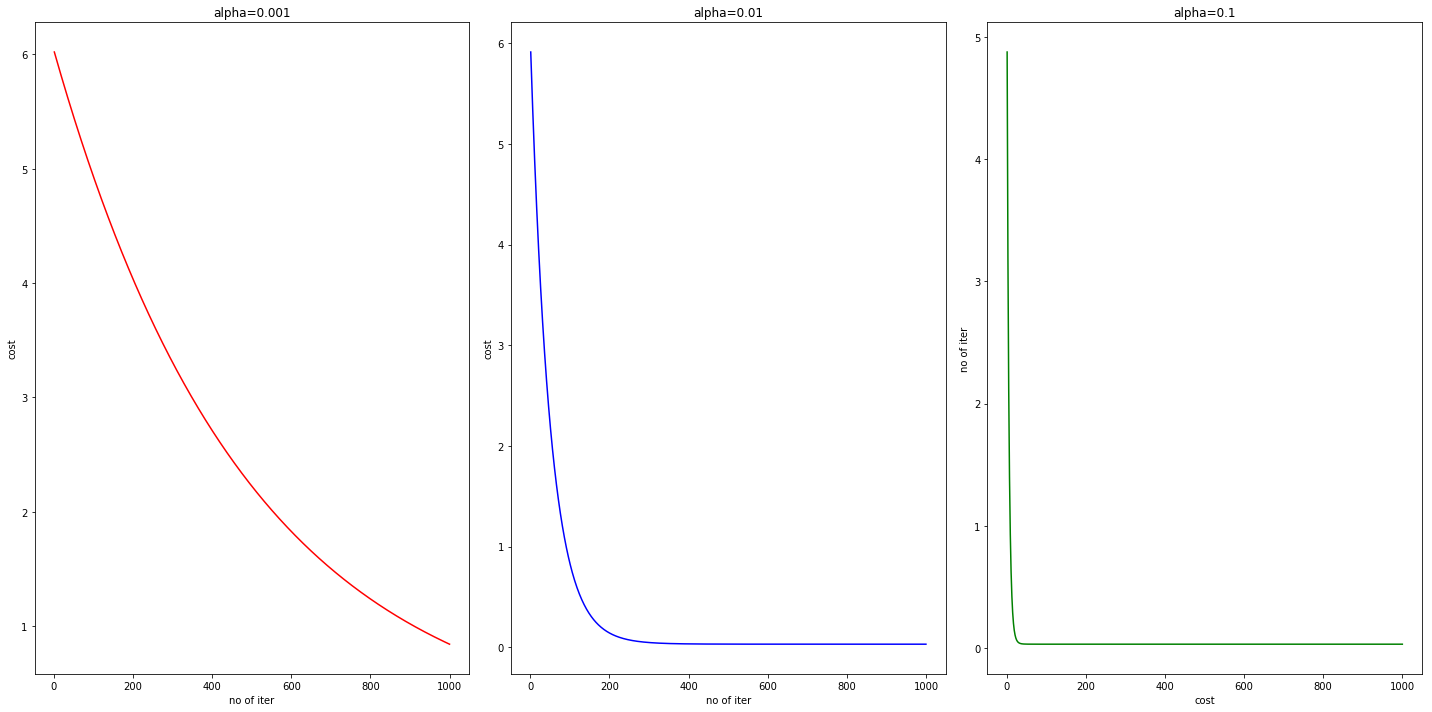

In [0]:
plt.figure(figsize=(20,10))
listalpha1=list1[0].tolist()
listalpha2=list1[1].tolist()
listalpha3= list1[2].tolist()
plt.subplot(1,3,1)
plt.plot(list(range(1,1001)),listalpha1,'r')
plt.ylabel('cost')
plt.xlabel('no of iter')
plt.title('alpha=0.001')
plt.subplot(1,3,2)
plt.plot(np.arange(1,1001).tolist(),listalpha2,'b')
plt.ylabel('cost')
plt.xlabel('no of iter')
plt.title('alpha=0.01')
plt.subplot(1,3,3)
plt.plot(np.arange(1,1001).tolist(),listalpha3,'g')
plt.xlabel('cost')
plt.ylabel('no of iter')
plt.title('alpha=0.1')
plt.tight_layout()

In [0]:
# Cross Validation
from sklearn.model_selection import cross_val_score
reg = LinearRegression(fit_intercept=True)
scores_train= cross_val_score(reg, x_train,y_train,cv=5)
scores_test= cross_val_score(reg,x_test,y_test)
print('mean train score is {}'.format(scores_train.mean()))
print('mean test score is {}'.format(scores_test.mean()))

mean train score is 0.7989157281804663
mean test score is 0.7653466696557318


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


# 2. Ridge

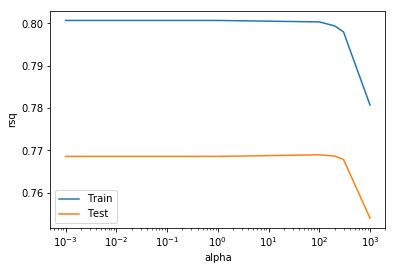

In [0]:
from  sklearn.linear_model import Ridge

x_range = [0.001,0.01,0.1,1,100,200,300,1000]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha,fit_intercept=True)
    ridge.fit(x_train,y_train)
    train_score_list.append(ridge.score(x_train,y_train))
    test_score_list.append(ridge.score(x_test, y_test))
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.plot(x_range,train_score_list,label='Train')
plt.plot(x_range,test_score_list,label='Test')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('rsq')
plt.legend()
plt.show()

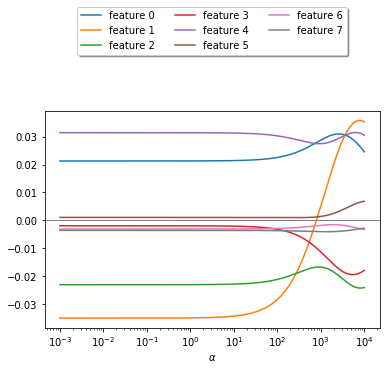

In [0]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha,fit_intercept=False)
    ridge.fit(x_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,8):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [0]:
#grid search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
a = [0.001,0.01,0.1,1,100,1000]
param_grid = dict(alpha=a)
grid = GridSearchCV(ridge, param_grid, cv=5)
grid.fit(x_train,y_train)
print('best param is alpha ={}'.format(grid.best_params_))

best param is alpha ={'alpha': 1000}


In [0]:
#cross validation
ridge = Ridge(alpha =1000)
train_score_list = cross_val_score(ridge,x_train,y_train,cv=5)
test_score_list = cross_val_score(ridge,x_test,y_test,cv=5)
print("Avg Train Score:%.4f"%train_score_list.mean())
print("Avg Test Score:%.4f"%test_score_list.mean())

Avg Train Score:0.7713
Avg Test Score:0.6252


In [0]:
#train and test score for alpha=1000
ridge=Ridge(alpha=1000)
rid=ridge.fit(x_train,y_train)
train_score=rid.score(x_train,y_train)
test_score= rid.score(x_test,y_test)
print('train_score:{}'.format(train_score))
print('test_score:{}'.format(test_score))

train_score:0.7806960706353703
test_score:0.7539948051983005


## Applying Bagging on Ridge

In [0]:
#grid search for bagging params
from sklearn.ensemble import BaggingRegressor
param_grid=[{'n_estimators':[50,100,150,200,300,400],'max_samples':[0.2,0.4,0.6,0.8,1.0]}]
ridge= Ridge(alpha=100)
bag_reg= BaggingRegressor(ridge,bootstrap=True, n_jobs=-1,oob_score=True,random_state=150)
grid = GridSearchCV(bag_reg,param_grid,cv=5)
grid.fit(x_train,y_train)
grid.best_params_


{'max_samples': 1.0, 'n_estimators': 100}

plotting a graph to cross check the best bagging parameter n_estimators

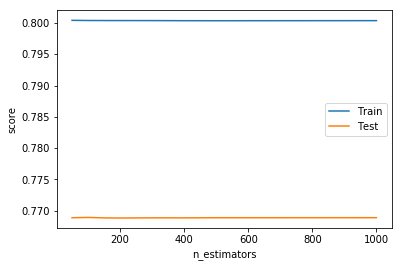

In [0]:
#bagging
from sklearn.ensemble import BaggingRegressor
train_score_list=[]
test_score_list=[]
for i in [50,100,150,200,300,400,500,1000]:
    ridge=Ridge(alpha=100)
    bag_reg= BaggingRegressor(ridge,n_estimators=i,max_samples=1.0,bootstrap=True, n_jobs=-1,random_state=150)
    bag_reg.fit(x_train,y_train)
    val_train=bag_reg.score(x_train,y_train)
    train_score_list.append(val_train)
    val_test= bag_reg.score(x_test,y_test)
    test_score_list.append(val_test)
#plot
plt.figure()
plt.plot([50,100,150,200,300,400,500,1000],train_score_list,label='Train')
plt.plot([50,100,150,200,300,400,500,1000],test_score_list,label='Test')
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.legend()
plt.show()


In [0]:
print(test_score_list[4])

0.7688814749064179


In [0]:
print(train_score_list[4])

0.8003589780646359


# 3. LASSO

Text(0.5, 0, '$\\alpha$')

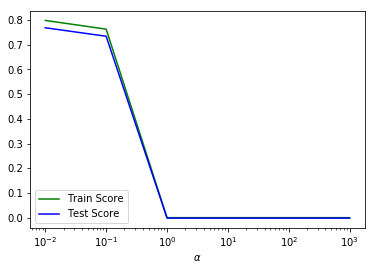

In [0]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100,1000]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha,fit_intercept=True)
    lasso.fit(x_train,y_train)
    train_score_list.append(lasso.score(x_train,y_train))
    test_score_list.append(lasso.score(x_test, y_test))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

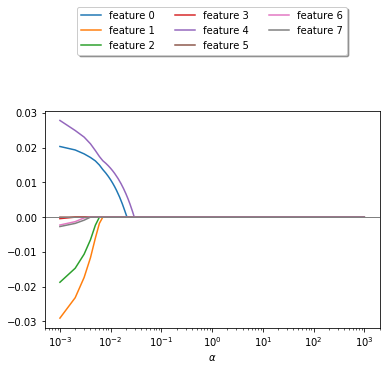

In [0]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha,fit_intercept=True)
    lasso.fit(x_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,8):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [0]:
#grid search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
a = [0.01,0.1,1,10,100,1000]
param_grid = dict(alpha=a)
grid = GridSearchCV(lasso, param_grid, cv=5)
grid.fit(x_train,y_train)
print('best param is alpha ={}'.format(grid.best_params_))

best param is alpha ={'alpha': 0.01}


In [0]:
# Using Cross Validation
from sklearn.model_selection import cross_val_score
lasso = Lasso(alpha=0.01)
train_score_list = cross_val_score(lasso,x_train,y_train,cv=5)
test_score_list = cross_val_score(lasso,x_test,y_test,cv=5)
print("Avg Train Score:%.4f"%train_score_list.mean())
print("Avg Test Score:%.4f"%test_score_list.mean())

Avg Train Score:0.7974
Avg Test Score:0.7642


In [0]:
#train and test score for alpha=0.01
lasso=Lasso(alpha=0.01)
lass=lasso.fit(x_train,y_train)
train_score=lass.score(x_train,y_train)
test_score= lass.score(x_test,y_test)
print('train_score:{}'.format(train_score))
print('test_score:{}'.format(test_score))

train_score:0.798273668594635
test_score:0.7686445462477194


## Applying Pasting on LASSO

In [0]:
#grid search for pasting params
param_grid=[{'n_estimators':[50,100,150,200,300,400,500],'max_samples':[0.1,0.2,0.4,0.6,0.8,1.0]}]
lasso=Lasso(alpha=1)
bag_reg= BaggingRegressor(lasso,bootstrap=False, n_jobs=-1,random_state=150)
grid = GridSearchCV(bag_reg,param_grid,cv=5)
grid.fit(x_train,y_train)
grid.best_params_

{'max_samples': 0.2, 'n_estimators': 50}

plotting a graph to cross check the best bagging parameters n_estimators

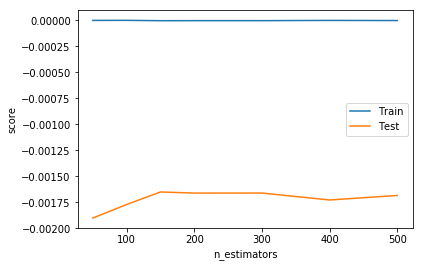

In [0]:
#pasting
from sklearn.ensemble import BaggingRegressor
train_score_list=[]
test_score_list=[]
for i in [50,100,150,200,300,400,500]:
    lasso=Lasso(alpha=1)
    bag_reg= BaggingRegressor(lasso,n_estimators=i,max_samples=0.2,bootstrap=False, n_jobs=-1,random_state=150)
    bag_reg.fit(x_train,y_train)
    val_train=bag_reg.score(x_train,y_train)
    train_score_list.append(val_train)
    val_test= bag_reg.score(x_test,y_test)
    test_score_list.append(val_test)
#plot
plt.figure()
plt.plot([50,100,150,200,300,400,500],train_score_list,label='Train')
plt.plot([50,100,150,200,300,400,500],test_score_list,label='Test')
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.legend()
plt.show()

In [0]:
print(max(train_score_list))
print(max(test_score_list))

-2.5750825383141773e-07
-0.0016499257461033423


# 4. KNN Regression

Text(0, 0.5, 'rsq')

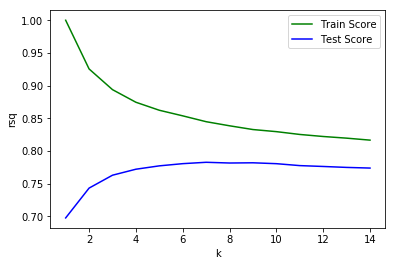

In [0]:
#kneighbours regressor
np.random.seed(0)
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,15):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(x_train, y_train)
    train_score_array.append(knn_reg.score(x_train, y_train))
    test_score_array.append(knn_reg.score(x_test, y_test))

x_axis = range(1,15)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('rsq')

In [0]:
#grid search
from sklearn.model_selection import GridSearchCV
k = [2,3,4,5,6,7,8,9]
param_grid = dict(n_neighbors=k)
grid = GridSearchCV(knn_reg, param_grid, cv=5)
grid.fit(x_train,y_train)
print('best param is k ={}'.format(grid.best_params_))

best param is k ={'n_neighbors': 9}


In [0]:
# Using Cross Validation
from sklearn.model_selection import cross_val_score
knn_reg = KNeighborsRegressor(n_neighbors=9)
train_score_list = cross_val_score(knn_reg,x_train,y_train,cv=5)
test_score_list = cross_val_score(knn_reg,x_test,y_test,cv=5)
print("Avg Train Score:%.4f"%train_score_list.mean())
print("Avg Test Score:%.4f"%test_score_list.mean())

Avg Train Score:0.7838
Avg Test Score:0.6975


In [0]:
#using knn,k=2
knn= KNeighborsRegressor(n_neighbors=9)
kn=knn.fit(x_train,y_train)
train_score=kn.score(x_train,y_train)
test_score=kn.score(x_test,y_test)
print('train_score:{}'.format(train_score))
print('test_score:{}'.format(test_score))

train_score:0.832784827867878
test_score:0.7819171742034617


## Applying Bagging on KNN

In [0]:
#grid search for bagging params
param_grid=[{'n_estimators':[50,100,150],'max_samples':[0.1,0.2,0.4]}]
knn_reg = KNeighborsRegressor(algorithm='brute',n_neighbors=9)
bag_reg= BaggingRegressor(knn_reg,bootstrap=True, n_jobs=-1,oob_score=True,random_state=150)
grid = GridSearchCV(bag_reg,param_grid,cv=5)
grid.fit(x_train,y_train)
grid.best_params_


{'max_samples': 0.4, 'n_estimators': 150}

plotting a graph to cross check the best bagging param n_estimator

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


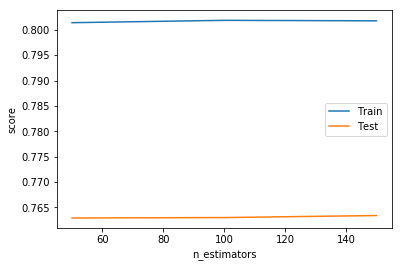

In [0]:
#bagging
from sklearn.ensemble import BaggingRegressor
train_score_list=[]
test_score_list=[]
for i in [50,100,150]:
    knn_reg = KNeighborsRegressor(algorithm='brute',n_neighbors=9)
    bag_reg= BaggingRegressor(knn_reg,n_estimators=i,max_samples=0.4,bootstrap=True, n_jobs=-1,random_state=150)
    bag_reg.fit(x_train,y_train)
    val_train=bag_reg.score(x_train,y_train)
    train_score_list.append(val_train)
    val_test= bag_reg.score(x_test,y_test)
    test_score_list.append(val_test)
#plot
plt.figure()
plt.plot([50,100,150],train_score_list,label='Train')
plt.plot([50,100,150],test_score_list,label='Test')
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.legend()
plt.show()

In [0]:
print(train_score_list[2],test_score_list[2])

0.8017858358492725 0.7633834487036555


# 5. Polynomial Regression

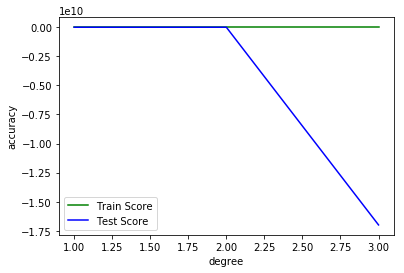

In [0]:
from  sklearn.preprocessing  import PolynomialFeatures
np.random.seed(0)
train_score_list = []
test_score_list = []

for n in range(1,4):
    poly = PolynomialFeatures(n)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.transform(x_test)
    lr= LinearRegression(fit_intercept=True)
    lr.fit(x_train_poly, y_train)
    train_score_list.append(lr.score(x_train_poly, y_train))
    test_score_list.append(lr.score(x_test_poly, y_test))
%matplotlib inline

x_axis = range(1,4)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

In [0]:
train_score_list

[0.8007021220693684, 0.822507987192185, 0.8497439348825057]

In [0]:
test_score_list

[0.7685743116393489, 0.7884000566479303, -16992161800.739191]

In [0]:
#cross validation
from sklearn.model_selection import cross_val_score
np.random.seed(0)
scores_test=[]
scores_train=[]
poly = PolynomialFeatures(1)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)
lr=LinearRegression()
lr.fit(x_train_poly,y_train)
scores_train = cross_val_score(lr,x_train_poly,y_train,cv=5)
scores_test = cross_val_score(lr,x_test_poly,y_test,cv=5)
print("Cross-validation Train scores: {}".format(scores_train))
print("Average Train cross-validation score: {:.2f}".format(scores_train.mean()))
print("Cross-validation Test scores: {}".format(scores_test))
print("Average Test cross-validation score: {:.2f}".format(scores_test.mean()))

Cross-validation Train scores: [0.78185295 0.82157544 0.79272817 0.80763101 0.79079107]
Average Train cross-validation score: 0.80
Cross-validation Test scores: [0.81082236 0.70907229 0.77168762 0.799057   0.71824038]
Average Test cross-validation score: 0.76


## Applying Gradient Boosting on Polynomial Regression

In [0]:
from sklearn.ensemble import GradientBoostingRegressor
param_grid=[{'n_estimators':[50,100,150],'learning_rate':[0.01,0.04,0.05,0.06,0.1]}]
grad = GradientBoostingRegressor(random_state=0)
grid = GridSearchCV(grad,param_grid,cv=5)
grid.fit(x_train_poly,y_train)
grid.best_params_


{'learning_rate': 0.1, 'n_estimators': 150}

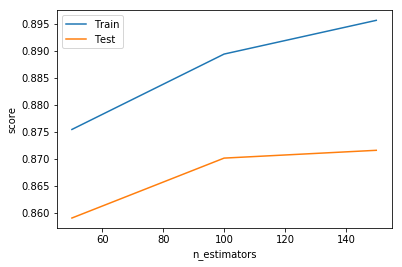

In [0]:
#plottting a graph to see weather the best param n_estimator can be relied upon
train_score_list=[]
test_score_list=[]
for i in [50,100,150]:
    grad = GradientBoostingRegressor(n_estimators=i,learning_rate=0.1,random_state=150)
    grad.fit(x_train_poly,y_train)
    val_train=grad.score(x_train_poly,y_train)
    train_score_list.append(val_train)
    val_test= grad.score(x_test_poly,y_test)
    test_score_list.append(val_test)
#plot
plt.figure()
plt.plot([50,100,150],train_score_list,label='Train')
plt.plot([50,100,150],test_score_list,label='Test')
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.legend()
plt.show()

In [0]:
print(train_score_list[2],test_score_list[2])

0.8956945093832328 0.8715831237848636


In [0]:
from sklearn.ensemble import GradientBoostingRegressor
grad = GradientBoostingRegressor(n_estimators=150,learning_rate=0.1,random_state=150)
grad.fit(x_train_poly,y_train)
print('Train score: {:.4f}'.format(grad.score(x_train_poly,y_train)))
print('Test score: {:.4f}'.format(grad.score(x_test_poly, y_test)))

Train score: 0.8957
Test score: 0.8716


In [0]:
train_score_list

[0.8754526900235502, 0.8894372034883319, 0.8956945093832328]

In [0]:
test_score_list

[0.8590227479946002, 0.8701364705404635, 0.8715831237848636]

# 6. Linear SVM Regression

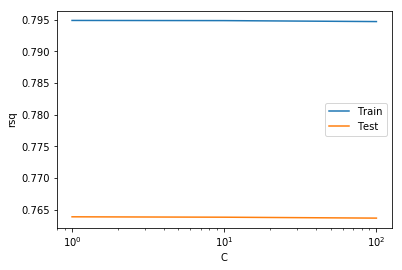

In [0]:
from sklearn.svm import LinearSVR
train_score_list=[]
test_score_list=[]
C=[1,10,100]

for i in C:
    svr = LinearSVR(C=i,max_iter=1000000,fit_intercept=True)
    svr.fit(x_train,y_train)
    train_score_list.append(svr.score(x_train,y_train))
    test_score_list.append(svr.score(x_test,y_test))

%matplotlib inline
plt.plot(C,train_score_list,label='Train')
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('rsq')
plt.plot(C,test_score_list,label='Test')
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('rsq')
plt.legend()
#,10,100

In [0]:
#grid search
from sklearn.model_selection import GridSearchCV
c= [1,10,100]
param_grid = dict(C=c)
grid = GridSearchCV(svr,param_grid, cv=5)
grid.fit(x_train,y_train)
print('best param is c ={}'.format(grid.best_params_))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


best param is c ={'C': 1}


In [0]:
#cross validation
from sklearn.model_selection import cross_val_score
svr = LinearSVR(C=1,max_iter=10000)
scores_train = cross_val_score(svr,x_train,y_train, cv=5)
scores_test= cross_val_score(svr,x_test,y_test, cv=5)
print('avg train score {}'.format(scores_train.mean()))
print('avg test score {}'.format(scores_test.mean()))

avg train score 0.793854963906372
avg test score 0.7553251702688308


## Applying Pasting on Linear SVM Regression

In [0]:
#grid search for pasting params
param_grid=[{'n_estimators':[50,100,150],'max_samples':[0.1,0.2,0.4]}]
svr = LinearSVR(C=1,max_iter=10000)
bag_reg= BaggingRegressor(svr,bootstrap=False, n_jobs=-1,random_state=150)
grid = GridSearchCV(bag_reg,param_grid,cv=5)
grid.fit(x_train,y_train)
grid.best_params_

{'max_samples': 0.1, 'n_estimators': 50}

In [0]:
svr.fit(x_train,y_train)
svr.score(x_test,y_test)

0.7636555816055316

plotting graphs to cross check the best pasting param n_estimators 

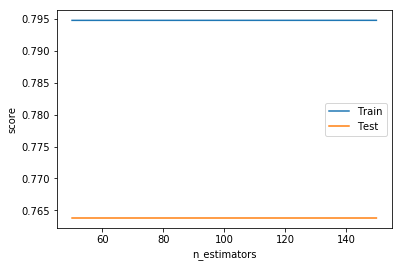

In [0]:
#pasting
from sklearn.ensemble import BaggingRegressor
train_score_list=[]
test_score_list=[]
for i in [50,100,150]:
    svr = LinearSVR(C=1,max_iter=10000)
    bag_reg= BaggingRegressor(svr,n_estimators=i,max_samples=0.1,bootstrap=False, n_jobs=-1,random_state=150)
    bag_reg.fit(x_train,y_train)
    val_train=bag_reg.score(x_train,y_train)
    train_score_list.append(val_train)
    val_test= bag_reg.score(x_test,y_test)
    test_score_list.append(val_test)
#plot
plt.figure()
plt.plot([50,100,150],train_score_list,label='Train')
plt.plot([50,100,150],test_score_list,label='Test')
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.legend()
plt.show()

In [0]:
train_score_list

[0.7947967673494516, 0.7947992869925026, 0.7948016158091828]

In [0]:
print(train_score_list[2],test_score_list[2])

0.7948016158091828 0.7637835247347762


## Applying AdaBoost on Linear SVM Regression

In [0]:
#adaboost 
#finding best params using grid search for adaboost
#grid search to find the best parameters
from sklearn.ensemble import AdaBoostRegressor
param_grid=[{'n_estimators':[50,100,150],'learning_rate':[0.01,0.02,0.03,0.04,0.05,0.1]}]
svr = LinearSVR(C=1,max_iter=100000)
ada = AdaBoostRegressor(svr,random_state=150)
grid = GridSearchCV(ada,param_grid,cv=5)
grid.fit(x_train,y_train)
grid.best_params_
#,200,300,400,500   ,0.15,0.06,0.001

{'learning_rate': 0.02, 'n_estimators': 100}

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


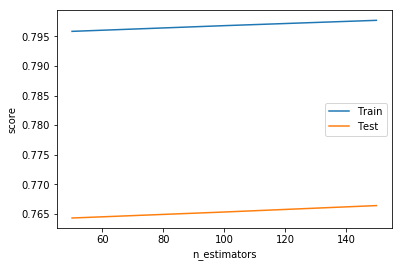

In [0]:
#plotting a graph to check whether the best parameter we got is the right one
#plotting a train test graph to see if the param  n_estimator is reliable
train_score_list=[]
test_score_list=[]
for i in [50,100,150]:
    svr = LinearSVR(C=1,max_iter=10000)
    ada = AdaBoostRegressor(svr,n_estimators=i,learning_rate=0.01,random_state=150)
    ada.fit(x_train,y_train)
    val_train=ada.score(x_train,y_train)
    train_score_list.append(val_train)
    val_test= ada.score(x_test,y_test)
    test_score_list.append(val_test)
#plot
plt.figure()
plt.plot([50,100,150],train_score_list,label='Train')
plt.plot([50,100,150],test_score_list,label='Test')
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.legend()
plt.show()


In [0]:
print(train_score_list[2],test_score_list[2])


0.7976978917748412 0.7664013147653257


# Deep Learning

## 1. Perceptron

In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [0]:
#step 1: build model
model1 = Sequential()
#input layer
model1.add(Dense(32,input_dim = 11 ,kernel_initializer='normal',activation = 'relu'))
#hidden layers
model1.add(Dense(16,input_dim = 11 ,kernel_initializer='normal',activation = 'relu'))
#output layer
model1.add(Dense(1, activation = 'sigmoid'))

In [0]:
#step 2: make computational graph - compile
model1.compile(loss= 'mean_absolute_error' , optimizer = 'adam',metrics = ['mean_absolute_error'] )

In [0]:
#step 3: train the model - fit
model1.fit(x_train, y_train, epochs = 50, batch_size = 300)

Epoch 1/50
5922/5922 [==============================] - 0s 59us/sample - loss: 2.8951 - mean_absolute_error: 2.8951
Epoch 2/50
5922/5922 [==============================] - 0s 7us/sample - loss: 2.8068 - mean_absolute_error: 2.8068
Epoch 3/50
5922/5922 [==============================] - 0s 7us/sample - loss: 2.6695 - mean_absolute_error: 2.6695
Epoch 4/50
5922/5922 [==============================] - 0s 7us/sample - loss: 2.5377 - mean_absolute_error: 2.5377
Epoch 5/50
5922/5922 [==============================] - 0s 6us/sample - loss: 2.4717 - mean_absolute_error: 2.4717
Epoch 6/50
5922/5922 [==============================] - 0s 7us/sample - loss: 2.4489 - mean_absolute_error: 2.4489
Epoch 7/50
5922/5922 [==============================] - 0s 7us/sample - loss: 2.4405 - mean_absolute_error: 2.4405
Epoch 8/50
5922/5922 [==============================] - 0s 7us/sample - loss: 2.4367 - mean_absolute_error: 2.4367
Epoch 9/50
5922/5922 [==============================] - 0s 7us/sample - loss: 2

In [0]:
#step 4: evaluate
print(model1.evaluate(x_train, y_train))
print(model1.evaluate(x_test, y_test))

5922/5922 [==============================] - 0s 26us/sample - loss: 2.4293 - mean_absolute_error: 2.4293
[2.4293215499460517, 2.4293218]
1481/1481 [==============================] - 0s 25us/sample - loss: 2.4060 - mean_absolute_error: 2.4060
[2.406049182815861, 2.4060488]


## 2. MLP

In [0]:
#step 1: build model
model2 = Sequential()
#input layer
model2.add(Dense(20, input_dim = 11, activation = 'relu'))
#hidden layers
model2.add(Dense(10, activation = 'relu'))
model2.add(Dense(5, activation = 'relu'))
#output layer
model2.add(Dense(1, activation = 'sigmoid'))

In [0]:
#step 2: compile the model
model2.compile(loss= 'mean_squared_error' , optimizer = 'adam',metrics = ['mean_squared_error'] )

In [0]:
#step 3: train the model
model2.fit(x_train, y_train, epochs = 30, batch_size = 150)

Epoch 1/30
5922/5922 [==============================] - 0s 26us/sample - loss: 8.7902 - mean_squared_error: 8.7902
Epoch 2/30
5922/5922 [==============================] - 0s 13us/sample - loss: 8.3474 - mean_squared_error: 8.3474
Epoch 3/30
5922/5922 [==============================] - 0s 13us/sample - loss: 7.3909 - mean_squared_error: 7.3909
Epoch 4/30
5922/5922 [==============================] - 0s 12us/sample - loss: 6.5614 - mean_squared_error: 6.5614
Epoch 5/30
5922/5922 [==============================] - 0s 12us/sample - loss: 6.3172 - mean_squared_error: 6.3172
Epoch 6/30
5922/5922 [==============================] - 0s 12us/sample - loss: 6.2590 - mean_squared_error: 6.2590
Epoch 7/30
5922/5922 [==============================] - 0s 12us/sample - loss: 6.2384 - mean_squared_error: 6.2384
Epoch 8/30
5922/5922 [==============================] - 0s 12us/sample - loss: 6.2286 - mean_squared_error: 6.2286
Epoch 9/30
5922/5922 [==============================] - 0s 12us/sample - loss: 6

In [0]:
#step 4: evaluate
print(model2.evaluate(x_train, y_train))
print(model2.evaluate(x_test, y_test))

5922/5922 [==============================] - 0s 28us/sample - loss: 6.2103 - mean_squared_error: 6.2103
[6.210278477873282, 6.2102785]
1481/1481 [==============================] - 0s 27us/sample - loss: 6.0885 - mean_squared_error: 6.0885
[6.088540516054204, 6.0885415]


# Regression with PCA

In [0]:
from sklearn.model_selection import train_test_split
x= data.drop('Aggregate rating',axis=1)
y=data['Aggregate rating']
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=150)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [0]:
from  sklearn.decomposition import PCA
pca= PCA(n_components=0.95)
pca.fit(x_train)
x_train= pca.transform(x_train)

In [0]:
x_test=pca.transform(x_test)

In [0]:
x_test

array([[ 3.75190641, -1.51674674,  1.13574366, ...,  1.24020938,
         1.52391611, -0.84043174],
       [-0.21475074, -1.57240436, -1.48691467, ..., -0.60793301,
        -1.0933417 ,  1.2455748 ],
       [ 5.52052602, -2.09346008,  0.65663202, ..., -0.11528171,
        -0.06206716,  0.45540058],
       ...,
       [ 0.10816709, -0.43367444, -0.43246694, ..., -0.9827894 ,
         0.67464704, -0.1308456 ],
       [-1.45858443, -0.46774767, -0.6818718 , ..., -0.04084996,
         0.04462203, -0.04103238],
       [-0.09406038,  0.19995032, -1.41772358, ..., -0.00931338,
        -0.0821923 , -0.281906  ]])

# 1. Linear Regression

In [0]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True)
lr.fit(x_train,y_train)
print("Train:%.4f"%lr.score(x_train,y_train))
print("Test:%.4f"%lr.score(x_test,y_test))

Train:0.7854
Test:0.7583


In [0]:
lr=LinearRegression(fit_intercept=True)
lr.fit(x_train,y_train)
ones=np.ones((x_train.shape[0],1))
array=np.array(x_train)
xdesg=np.matrix(np.hstack((ones,array)))
xdesg=np.matrix(xdesg)
coef=lr.coef_.tolist()
coef.insert(0,lr.intercept_)
theta1=(np.array(coef).reshape(10))
y_actual=np.array(y_train).reshape(x_train.shape[0],1)
theta1

array([ 3.42921613,  0.22698201,  0.01598579,  0.01236884,  0.13276739,
        0.12444881, -0.08400109, -0.05240886,  0.06189681, -0.34303785])

# 2. Performing Gradient Descent

In [0]:
def hypothesis(theta, X,n):
    h = np.ones((X.shape[0],1))
    theta = theta.reshape(1,n+1)
    for i in range(0,X.shape[0]):
        h[i] = float(np.dot(theta,xdesg.T[:,i]))
    h = h.reshape(X.shape[0],1)
    return h

In [0]:
h=hypothesis(theta1,xdesg,9)

In [0]:
def BGD(theta, alpha, num_iters, h, X, y, n):
    cost = np.ones(num_iters)
    for i in range(0,num_iters):
        theta[0] = theta[0] - (alpha/X.shape[0]) * float(sum(h - y))
        for j in range(1,n+1):
            theta[j] = theta[j] - ((alpha/X.shape[0]) * float(sum(np.dot(X.T[j],(h-y)))))
        h = hypothesis(theta, X, n)
        cost[i] = (1/X.shape[0]) * 0.5 * float(sum(np.square(h - y_actual)))
    theta = theta.reshape(1,n+1)
    return theta, cost

In [0]:
def linear_regression(X, y, alpha, num_iters):
    n = 9
    # initializing the parameter vector...
    theta = np.zeros(n+1)
    # hypothesis calculation....
    h = hypothesis(theta, xdesg, 9)
    # returning the optimized parameters by Gradient Descent...
    theta, cost = BGD(theta,alpha,num_iters,h,X,y,n)
    return theta, cost

In [0]:
list1=[]
for alpha in [0.001,0.01,0.1]:
    list1.append(linear_regression(xdesg,y_actual,alpha,1000)[1])

In [0]:
list1

[array([6.02178178, 6.00959244, 5.99742879, 5.9852908 , 5.97317838,
        5.9610915 , 5.94903008, 5.93699407, 5.92498341, 5.91299805,
        5.90103792, 5.88910297, 5.87719315, 5.86530838, 5.85344863,
        5.84161382, 5.8298039 , 5.81801883, 5.80625853, 5.79452295,
        5.78281204, 5.77112575, 5.75946401, 5.74782676, 5.73621396,
        5.72462555, 5.71306147, 5.70152167, 5.6900061 , 5.67851469,
        5.66704739, 5.65560415, 5.64418492, 5.63278963, 5.62141824,
        5.61007069, 5.59874693, 5.5874469 , 5.57617056, 5.56491783,
        5.55368869, 5.54248306, 5.5313009 , 5.52014215, 5.50900677,
        5.49789469, 5.48680588, 5.47574026, 5.4646978 , 5.45367843,
        5.44268212, 5.4317088 , 5.42075842, 5.40983094, 5.3989263 ,
        5.38804445, 5.37718533, 5.36634891, 5.35553512, 5.34474392,
        5.33397525, 5.32322907, 5.31250533, 5.30180397, 5.29112494,
        5.2804682 , 5.2698337 , 5.25922137, 5.24863119, 5.23806309,
        5.22751703, 5.21699295, 5.20649082, 5.19

In [0]:
linear_regression(xdesg,y_actual,0.1,1000)

(array([[ 3.42921613,  0.22698201,  0.01598579,  0.01236884,  0.13276739,
          0.12444881, -0.08400109, -0.05240886,  0.06189681, -0.34303785]]),
 array([4.87631937, 3.94798586, 3.20086675, 2.59814902, 2.11115349,
        1.71724746, 1.39841149, 1.14021361, 0.93104942, 0.76156377,
        0.62420189, 0.51285605, 0.42258473, 0.34938798, 0.29002697,
        0.24187854, 0.20281782, 0.17112342, 0.14540062, 0.12451933,
        0.10756381, 0.09379193, 0.08260226, 0.0735073 , 0.06611192,
        0.0600958 , 0.05519923, 0.05121164, 0.04796229, 0.04531267,
        0.04315045, 0.04138448, 0.03994081, 0.03875941, 0.03779154,
        0.03699764, 0.03634555, 0.03580916, 0.03536722, 0.03500248,
        0.03470089, 0.034451  , 0.03424351, 0.03407082, 0.03392675,
        0.03380623, 0.03370514, 0.03362011, 0.03354837, 0.03348765,
        0.03343611, 0.03339221, 0.03335469, 0.03332253, 0.03329486,
        0.03327098, 0.03325031, 0.03323235, 0.0332167 , 0.03320302,
        0.03319103, 0.0331805 , 0

# Cost Function Vs Number Of Iterations gradient descent

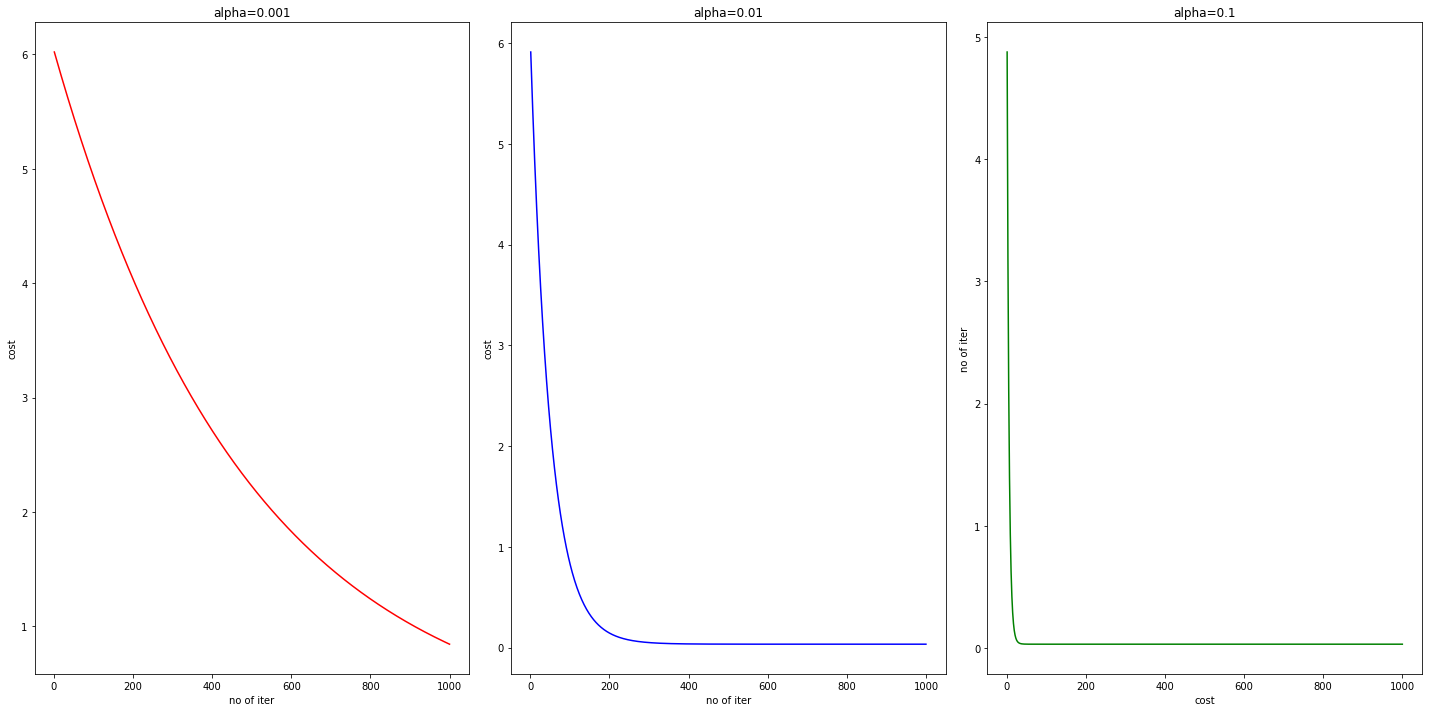

In [0]:
plt.figure(figsize=(20,10))
listalpha1=list1[0].tolist()
listalpha2=list1[1].tolist()
listalpha3= list1[2].tolist()
plt.subplot(1,3,1)
plt.plot(list(range(1,1001)),listalpha1,'r')
plt.ylabel('cost')
plt.xlabel('no of iter')
plt.title('alpha=0.001')
plt.subplot(1,3,2)
plt.plot(np.arange(1,1001).tolist(),listalpha2,'b')
plt.ylabel('cost')
plt.xlabel('no of iter')
plt.title('alpha=0.01')
plt.subplot(1,3,3)
plt.plot(np.arange(1,1001).tolist(),listalpha3,'g')
plt.xlabel('cost')
plt.ylabel('no of iter')
plt.title('alpha=0.1')
plt.tight_layout()

In [0]:
# Cross Validation
from sklearn.model_selection import cross_val_score
reg = LinearRegression(fit_intercept=True)
scores_train= cross_val_score(reg, x_train,y_train,cv=5)
scores_test= cross_val_score(reg,x_test,y_test)
print('mean train score is {}'.format(scores_train.mean()))
print('mean test score is {}'.format(scores_test.mean()))

mean train score is 0.783564170392965
mean test score is 0.7502091457135144


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


# 2. Ridge

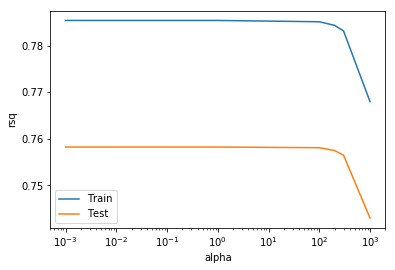

In [0]:
from  sklearn.linear_model import Ridge

x_range = [0.001,0.01,0.1,1,100,200,300,1000]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha,fit_intercept=True)
    ridge.fit(x_train,y_train)
    train_score_list.append(ridge.score(x_train,y_train))
    test_score_list.append(ridge.score(x_test, y_test))
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.plot(x_range,train_score_list,label='Train')
plt.plot(x_range,test_score_list,label='Test')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('rsq')
plt.legend()
plt.show()

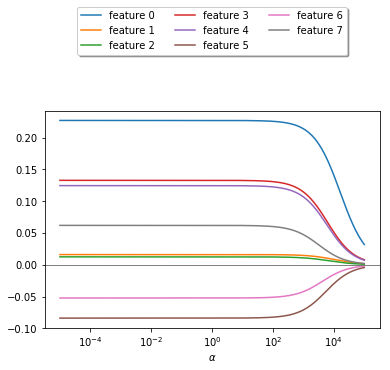

In [0]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.00001, 0.0001, 1).reshape(-1,1)
x_range2 = np.linspace(0.1, 100000, 100000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha,fit_intercept=False)
    ridge.fit(x_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,8):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.0001, xmax=99999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [0]:
#grid search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
a = [0.001,0.01,0.1,1,100,1000]
param_grid = dict(alpha=a)
grid = GridSearchCV(ridge, param_grid, cv=5)
grid.fit(x_train,y_train)
print('best param is alpha ={}'.format(grid.best_params_))

best param is alpha ={'alpha': 1000}


In [0]:
#cross validation
ridge = Ridge(alpha =1000)
train_score_list = cross_val_score(ridge,x_train,y_train,cv=5)
test_score_list = cross_val_score(ridge,x_test,y_test,cv=5)
print("Avg Train Score:%.4f"%train_score_list.mean())
print("Avg Test Score:%.4f"%test_score_list.mean())

Avg Train Score:0.7595
Avg Test Score:0.6208


In [0]:
#train and test score for alpha=100
ridge=Ridge(alpha=1000)
rid=ridge.fit(x_train,y_train)
train_score=rid.score(x_train,y_train)
test_score= rid.score(x_test,y_test)
print('train_score:{}'.format(train_score))
print('test_score:{}'.format(test_score))

train_score:0.768001334017657
test_score:0.7429835932227291


# 3. LASSO

Text(0.5, 0, '$\\alpha$')

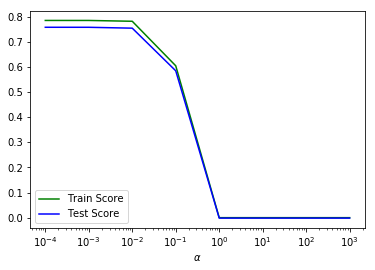

In [0]:
from sklearn.linear_model import Lasso
x_range = [0.0001,0.001,0.01, 0.1, 1, 10, 100,1000]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha,fit_intercept=True)
    lasso.fit(x_train,y_train)
    train_score_list.append(lasso.score(x_train,y_train))
    test_score_list.append(lasso.score(x_test, y_test))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

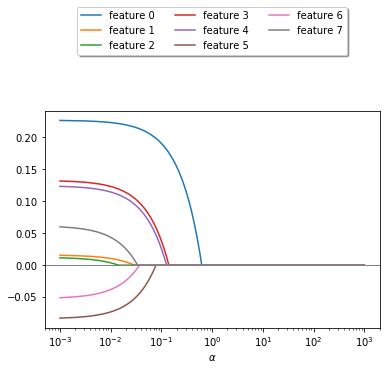

In [0]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha,fit_intercept=True)
    lasso.fit(x_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,8):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [0]:
#grid search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
a = [0.01,0.1,1,10,100,1000]
param_grid = dict(alpha=a)
grid = GridSearchCV(lasso, param_grid, cv=5)
grid.fit(x_train,y_train)
print('best param is alpha ={}'.format(grid.best_params_))

best param is alpha ={'alpha': 0.01}


In [0]:
# Using Cross Validation
from sklearn.model_selection import cross_val_score
lasso = Lasso(alpha=0.01)
train_score_list = cross_val_score(lasso,x_train,y_train,cv=5)
test_score_list = cross_val_score(lasso,x_test,y_test,cv=5)
print("Avg Train Score:%.4f"%train_score_list.mean())
print("Avg Test Score:%.4f"%test_score_list.mean())

Avg Train Score:0.7803
Avg Test Score:0.7457


In [0]:
#train and test score for alpha=1
lasso=Lasso(alpha=0.01)
lass=lasso.fit(x_train,y_train)
train_score=lass.score(x_train,y_train)
test_score= lass.score(x_test,y_test)
print('train_score:{}'.format(train_score))
print('test_score:{}'.format(test_score))

train_score:0.7821470954223795
test_score:0.7546935891615614


# 4. KNN Regression

Text(0, 0.5, 'rsq')

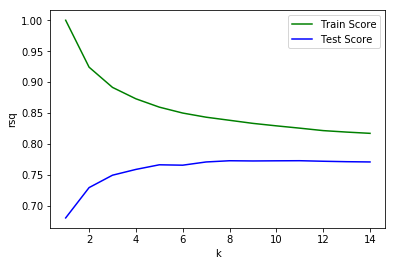

In [0]:
#kneibhours regressor
np.random.seed(0)
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,15):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(x_train, y_train)
    train_score_array.append(knn_reg.score(x_train, y_train))
    test_score_array.append(knn_reg.score(x_test, y_test))

x_axis = range(1,15)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('rsq')

In [0]:
#grid search
from sklearn.model_selection import GridSearchCV
k = [2,3,4,5,6,7,8,9]
param_grid = dict(n_neighbors=k)
grid = GridSearchCV(knn_reg, param_grid, cv=5)
grid.fit(x_train,y_train)
print('best param is k ={}'.format(grid.best_params_))

best param is k ={'n_neighbors': 9}


In [0]:
# Using Cross Validation
from sklearn.model_selection import cross_val_score
knn_reg = KNeighborsRegressor(n_neighbors=9)
train_score_list = cross_val_score(knn_reg,x_train,y_train,cv=5)
test_score_list = cross_val_score(knn_reg,x_test,y_test,cv=5)
print("Avg Train Score:%.4f"%train_score_list.mean())
print("Avg Test Score:%.4f"%test_score_list.mean())

Avg Train Score:0.7834
Avg Test Score:0.7084


In [0]:
#using knn,k=2
knn= KNeighborsRegressor(n_neighbors=9)
kn=knn.fit(x_train,y_train)
train_score=kn.score(x_train,y_train)
test_score=kn.score(x_test,y_test)
print('train_score:{}'.format(train_score))
print('test_score:{}'.format(test_score))

train_score:0.8333974404367532
test_score:0.7726965598759331


# 5. Polynomial Regression

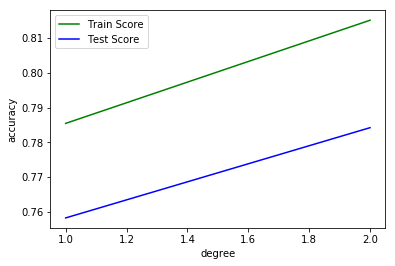

In [0]:
from  sklearn.preprocessing  import PolynomialFeatures
np.random.seed(0)
train_score_list = []
test_score_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.transform(x_test)
    lr= LinearRegression(fit_intercept=True)
    lr.fit(x_train_poly, y_train)
    train_score_list.append(lr.score(x_train_poly, y_train))
    test_score_list.append(lr.score(x_test_poly, y_test))
%matplotlib inline

x_axis = range(1,3)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

n=2 gives the best value for polynomial regression

In [0]:
train_score_list

[0.7854442528526975, 0.8151101526434779]

In [0]:
test_score_list

[0.7582540217024788, 0.7842075031218746]

In [0]:
#cross validation
from sklearn.model_selection import cross_val_score
np.random.seed(0)
scores_test=[]
scores_train=[]
poly = PolynomialFeatures(1)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)
lr=LinearRegression()
lr.fit(x_train_poly,y_train)
scores_train = cross_val_score(lr,x_train_poly,y_train,cv=5)
scores_test = cross_val_score(lr,x_test_poly,y_test,cv=5)
print("Cross-validation Train scores: {}".format(scores_train))
print("Average Train cross-validation score: {:.2f}".format(scores_train.mean()))
print("Cross-validation Test scores: {}".format(scores_test))
print("Average Test cross-validation score: {:.2f}".format(scores_test.mean()))

Cross-validation Train scores: [0.76211261 0.80588239 0.77477973 0.79521484 0.77983129]
Average Train cross-validation score: 0.78
Cross-validation Test scores: [0.80384099 0.67150907 0.7566464  0.79679041 0.70945409]
Average Test cross-validation score: 0.75


# 6. Linear SVM Regression

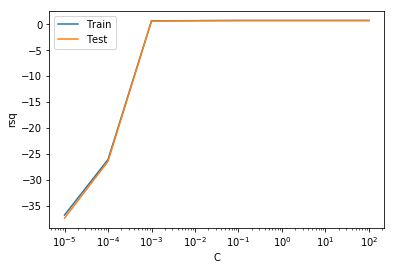

In [0]:
from sklearn.svm import LinearSVR
train_score_list=[]
test_score_list=[]
C=[0.00001,0.0001,0.001,0.1,0.2,0.3,1,10,100]

for i in C:
    svr = LinearSVR(C=i,max_iter=1000000,fit_intercept=True)
    svr.fit(x_train,y_train)
    train_score_list.append(svr.score(x_train,y_train))
    test_score_list.append(svr.score(x_test,y_test))

%matplotlib inline
plt.plot(C,train_score_list,label='Train')
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('rsq')
plt.plot(C,test_score_list,label='Test')
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('rsq')
plt.legend()

In [0]:
#grid search
from sklearn.model_selection import GridSearchCV
c= [0.1,0.2,0.3,0.5,1]
param_grid = dict(C=c)
grid = GridSearchCV(svr,param_grid, cv=5)
grid.fit(x_train,y_train)
print('best param is c ={}'.format(grid.best_params_))

best param is c ={'C': 0.3}


In [0]:
#cross validation
from sklearn.model_selection import cross_val_score
svr = LinearSVR(C=0.3,max_iter=10000)
scores_train = cross_val_score(svr,x_train,y_train, cv=5)
scores_test= cross_val_score(svr,x_test,y_test, cv=5)
print('avg train score {}'.format(scores_train.mean()))
print('avg test score {}'.format(scores_test.mean()))

avg train score 0.781094700040188
avg test score 0.7421134875631366


# 7. Kernelized SVM Regression

# RBF Kernel

In [0]:
#grid search for svr with rbf kernal
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
c= [0.0001,0.001,0.01,0.1,1,10]
gamma=[0.0001,0.001,0.01,0.1,1,10]
param_grid = {'C':[0.0001,0.001,0.01,0.1,1,10],'gamma':[0.0001,0.001,0.01,0.1,1,10]}
grid = GridSearchCV(SVR(kernel='rbf'),param_grid, cv=5)
grid.fit(x_train,y_train)
print('best params are  ={}'.format(grid.best_params_))

best params are  ={'C': 10, 'gamma': 0.1}


In [0]:
#cross validation for svr with rbf kernal
from sklearn.model_selection import cross_val_score
scores_train = cross_val_score(SVR(kernel='rbf',gamma=0.1,C=10),x_train,y_train, cv=5)
scores_test= cross_val_score(SVR(kernel='rbf',gamma=0.1,C=10),x_test,y_test, cv=5)
print('avg train score {}'.format(scores_train.mean()))
print('avg test score {}'.format(scores_test.mean()))

avg train score 0.8119427202512952
avg test score 0.7607351065596162


# Linear Kernel

In [0]:
#grid search for svr with linear kernal
from sklearn.model_selection import GridSearchCV
scores_test=[]
scores_train=[]
c= [0.0001,0.001,0.01,0.1,1,10]
gamma=[0.0001,0.001,0.01,0.1,1,10]
param_grid = {'C':[0.0001,0.001,0.01,0.1,1,10],'gamma':[0.0001,0.001,0.01,0.1,1,10]}
grid = GridSearchCV(SVR(kernel='linear'),param_grid, cv=5)
grid.fit(x_train,y_train)
print('best params are  ={}'.format(grid.best_params_))

best params are  ={'C': 0.1, 'gamma': 0.0001}


In [0]:
#cross validation for svr with linear kernal
from sklearn.model_selection import cross_val_score
scores_train=[]
scores_test=[]
scores_train = cross_val_score(SVR(kernel='linear',gamma=0.0001,C=0.1),x_train,y_train, cv=5)
scores_test= cross_val_score(SVR(kernel='linear',gamma=0.0001,C=0.1),x_test,y_test, cv=5)
print('avg train score {}'.format(scores_train.mean()))
print('avg test score {}'.format(scores_test.mean()))

avg train score 0.7804738470853969
avg test score 0.7408190448987997


# Before PCA

In [6]:
Regression = {'Model':['Linear Regression','Ridge Regression','Lasso Regression','KNN Regression','Polynomial Regression','Linear SVM Regression', 'RBF Kernel', 'Linear Kernel'],'Avg.Train Score':[0.8000,0.8001,0.7902,0.7762,0.8000,0.7951,0.7850,0.7974],'Avg_Test_Score':[0.7683,0.7721,0.7645,0.7321,0.7921,0.7680,0.7414,0.7706]}
Regression_before_pca = pd.DataFrame(Regression)
Regression_before_pca

,Model,Avg.Train Score,Avg_Test_Score
0,Linear Regression,0.8000,0.7683
1,Ridge Regression,0.8001,0.7721
2,Lasso Regression,0.7902,0.7645
3,KNN Regression,0.7762,0.7321
4,Polynomial Regression,0.8000,0.7921
5,Linear SVM Regression,0.7951,0.7680
6,RBF Kernel,0.7850,0.7414
7,Linear Kernel,0.7974,0.7706


# After PCA

In [7]:
Regression = {'Model':['Linear Regression','Ridge Regression','Lasso Regression','KNN Regression','Polynomial Regression','Linear SVM Regression', 'RBF Kernel', 'Linear Kernel'],'Avg.Train Score':[0.7854,0.7595,0.7803,0.7834,0.7800,0.7810,0.8119,0.7804],'Avg_Test_Score':[0.7583,0.6208,0.7457,0.7084,0.7500,0.7421,0.7607,0.7408]}
Regression_after_pca = pd.DataFrame(Regression)
Regression_after_pca

,Model,Avg.Train Score,Avg_Test_Score
0,Linear Regression,0.7854,0.7583
1,Ridge Regression,0.7595,0.6208
2,Lasso Regression,0.7803,0.7457
3,KNN Regression,0.7834,0.7084
4,Polynomial Regression,0.7800,0.7500
5,Linear SVM Regression,0.7810,0.7421
6,RBF Kernel,0.8119,0.7607
7,Linear Kernel,0.7804,0.7408


So, after doing pca we can see the average cross validation scores for both train and test have increased, but some are increased only by a very small amount.